In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.rename(columns={'v1':'target', 'v2':'sms message'},inplace = True)
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [8]:
df['target']=encoder.fit_transform(df['target'])
# spam == 1

In [9]:
df.isnull().sum()

target         0
sms message    0
dtype: int64

In [10]:
df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)

DATA ANALYSIS

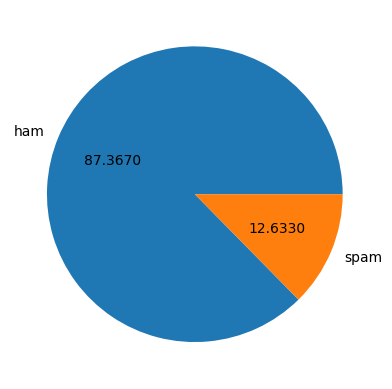

In [12]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.4f')
plt.show()

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\15878\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df['numChar']=df['sms message'].apply(len)
df.head()

,target,sms message,numChar
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
df['tokens']=df['sms message'].apply( nltk.word_tokenize)
df['numTokens']=df['tokens'].apply(len)
df['numSentences']=(df['sms message'].apply( nltk.sent_tokenize)).apply(len)
df.head()

,target,sms message,numChar,tokens,numTokens,numSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,2
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,1


In [16]:
df.describe()

,target,numChar,numTokens,numSentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [17]:
import seaborn as sns

<Axes: xlabel='numChar', ylabel='Count'>

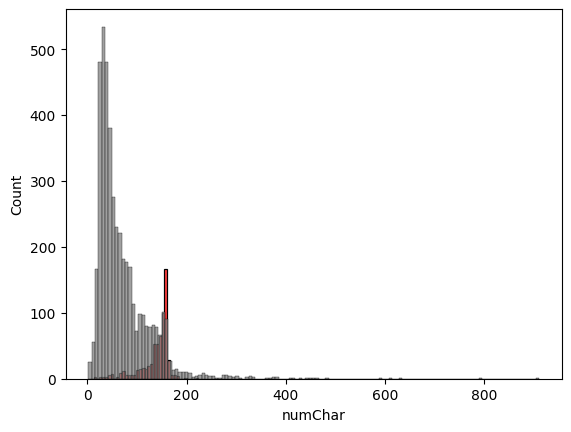

In [18]:
sns.histplot(df[df['target']==1]['numChar'], color ='red' )
sns.histplot(df[df['target']==0]['numChar'], color = 'gray')

<Axes: xlabel='numTokens', ylabel='Count'>

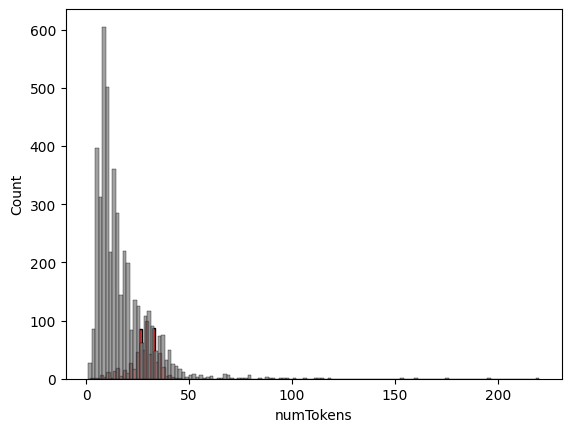

In [19]:
sns.histplot(df[df['target']==1]['numTokens'], color ='red' )
sns.histplot(df[df['target']==0]['numTokens'], color = 'gray')

<Axes: xlabel='numSentences', ylabel='Count'>

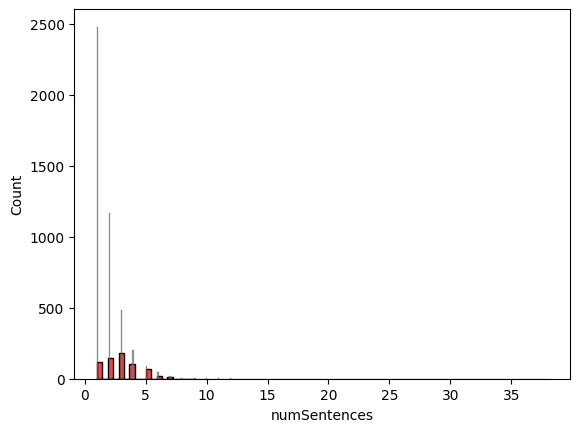

In [20]:
sns.histplot(df[df['target']==1]['numSentences'], color ='red' )
sns.histplot(df[df['target']==0]['numSentences'], color = 'gray')

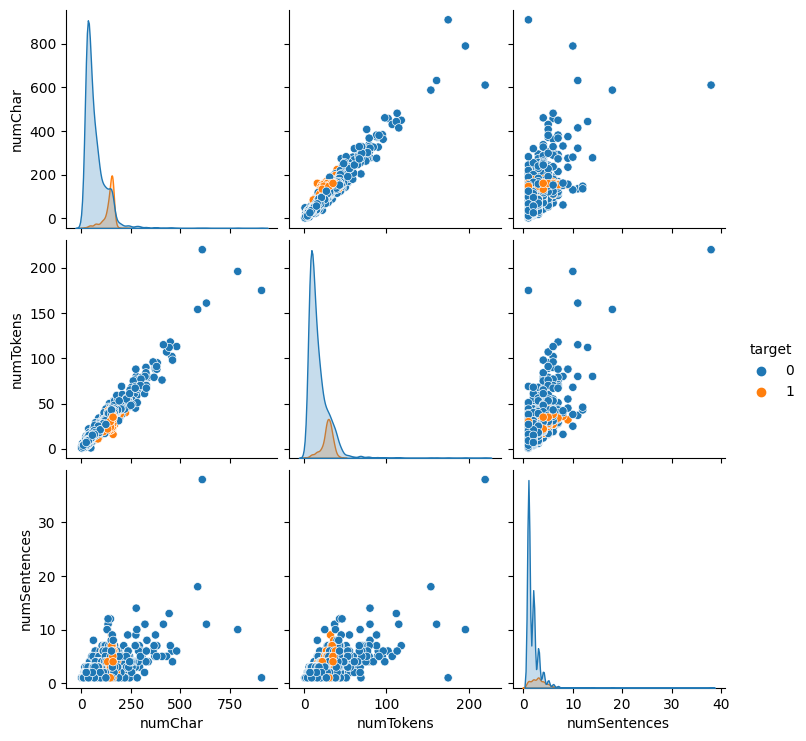

In [21]:
sns.pairplot(df, hue = 'target')

DATA PREPROCESSING
lower case
tokenization
removing special characters
remove stop words
stemming

In [22]:
from nltk.corpus import stopwords


In [23]:
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transformText(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    rT = []
    for i in text:
        if i.isalnum():
            rT.append(ps.stem(i))

    text =rT[:]
    rT.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in punctuation:
            rT.append(i)

    return rT


In [24]:
df['sms message']= df['sms message'].apply(transformText)

In [25]:
df.head(15)

,target,sms message,numChar,tokens,numTokens,numSentences
0,0,"[go, jurong, point, crazi, avail, onli, bugi, ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,2
1,0,"[ok, lar, joke, wif, u, oni]",29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,2
2,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,2
3,0,"[u, dun, say, earli, hor, u, c, alreadi, say]",49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,1
4,0,"[nah, think, goe, usf, live, around, though]",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,1
5,1,"[freemsg, hey, darl, 3, week, word, back, like...",148,"[FreeMsg, Hey, there, darling, it, 's, been, 3...",39,4
6,0,"[even, brother, like, speak, treat, like, aid,...",77,"[Even, my, brother, is, not, like, to, speak, ...",18,2
7,0,"[per, request, mell, oru, minnaminungint, nuru...",160,"[As, per, your, request, 'Melle, Melle, (, Oru...",31,2
8,1,"[winner, valu, network, custom, select, receiv...",158,"[WINNER, !, !, As, a, valued, network, custome...",32,5
9,1,"[mobil, 11, month, u, r, entitl, updat, latest...",154,"[Had, your, mobile, 11, months, or, more, ?, U...",31,3


In [26]:
from wordcloud import WordCloud


In [27]:
wc = WordCloud(width = 1000, height = 1000, min_font_size=10, background_color='white')


In [28]:

df['sms message2'] = df['sms message'].astype(str)

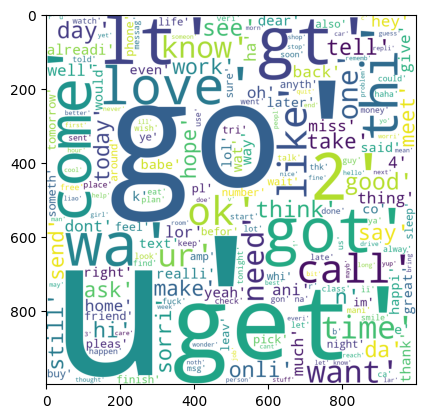

In [29]:
notSpamWC=wc.generate(df[df['target'] == 0]['sms message2'].str.cat( sep =" "))
plt.imshow(wc)

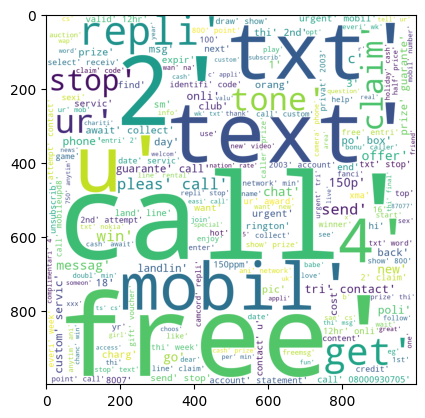

In [30]:
spamWC=wc.generate(df[df['target'] == 1]['sms message2'].str.cat( sep =" "))
plt.imshow(spamWC)

In [31]:
df.head(5
)

,target,sms message,numChar,tokens,numTokens,numSentences,sms message2
0,0,"[go, jurong, point, crazi, avail, onli, bugi, ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,2,"['go', 'jurong', 'point', 'crazi', 'avail', 'o..."
1,0,"[ok, lar, joke, wif, u, oni]",29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,2,"['ok', 'lar', 'joke', 'wif', 'u', 'oni']"
2,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,2,"['free', 'entri', '2', 'wkli', 'comp', 'win', ..."
3,0,"[u, dun, say, earli, hor, u, c, alreadi, say]",49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,1,"['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', ..."
4,0,"[nah, think, goe, usf, live, around, though]",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,1,"['nah', 'think', 'goe', 'usf', 'live', 'around..."


In [32]:
spamCorpus= []

for i in df[df['target']==1]['sms message'].tolist():
    for word in i :
        spamCorpus.append(word)

len(spamCorpus)

hamCorpus= []
for i in df[df['target']==0]['sms message'].tolist():
    for word in i :
        hamCorpus.append(word)

len(spamCorpus)
len(hamCorpus)



36420

In [33]:
#SPAM WORDS

from collections import Counter
Counter(spamCorpus).most_common(50)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('thi', 82),
 ('get', 74),
 ('onli', 66),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('go', 32),
 ('receiv', 31),
 ('want', 31),
 ('latest', 30)]

In [34]:
#HAM WORDS
Counter(hamCorpus).most_common(50)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('thi', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('wa', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('hi', 167),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129),
 ('onli', 128),
 ('say', 127),
 ('back', 127),
 ('today', 123),
 ('hope', 122),
 ('ask', 121),
 ('sorri', 121),
 ('n', 120),
 ('send', 120),
 ('r', 120),
 ('work', 118),
 ('dont', 118),
 ('meet', 112),
 ('well', 109),
 ('thing', 109),
 ('wat', 108),
 ('k', 107)]

Model Selection

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3200)
df['sms message2'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))


In [48]:
X = tf.fit_transform(df['sms message2']).toarray()
Y = df['target'].values

In [49]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20, random_state=4)

NAIVE BAYES

In [39]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [40]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [62]:
gnb.fit(X_train, Y_train)
y_predGNB = gnb.predict(X_test)
print(accuracy_score(Y_test,y_predGNB))
print(confusion_matrix(Y_test,y_predGNB))
print(precision_score(Y_test,y_predGNB))

0.8820116054158608
[[801 105]
 [ 17 111]]
0.5138888888888888


In [63]:
mnb.fit(X_train, Y_train)
y_predMNB = mnb.predict(X_test)
print(accuracy_score(Y_test,y_predMNB))
print(confusion_matrix(Y_test,y_predMNB))
print(precision_score(Y_test,y_predMNB))

0.9709864603481625
[[905   1]
 [ 29  99]]
0.99


In [64]:
bnb.fit(X_train, Y_train)
y_predBNB = mnb.predict(X_test)
print(accuracy_score(Y_test,y_predBNB))
print(confusion_matrix(Y_test,y_predBNB))
print(precision_score(Y_test,y_predBNB))

0.9709864603481625
[[905   1]
 [ 29  99]]
0.99


MODEL IMPROVEMENT (used max_features, best results at 2800)

In [45]:
import pickle


In [46]:
pickle.dump(tf, open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('bnbModel.pkl','wb'))
pickle.dump(mnb,open('mnbModel.pkl','wb'))
pickle.dump(transformText,open('textTransform.pkl','wb'))